<a href="https://colab.research.google.com/github/agnihotri95/Data-Visualization-in-Python/blob/main/Data_Visualization_and_Missing_Value_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-2 : Zomato Dataset Analysis

Submitted by:
Agnihotri Ghosh (20020845003)



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls

gdrive	sample_data


Importing necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotnine import ggplot, geom_bar, aes, stat_smooth, facet_wrap,coord_flip,geom_line

Reading the dataset

In [ ]:
df = pd.read_csv ('gdrive/My Drive/Machine Learning/Zomato Assignment/zomato.csv', sep=',')

df.head()

url  ... listed_in(city)
0  https://www.zomato.com/bangalore/jalsa-banasha...  ...    Banashankari
1  https://www.zomato.com/bangalore/spice-elephan...  ...    Banashankari
2  https://www.zomato.com/SanchurroBangalore?cont...  ...    Banashankari
3  https://www.zomato.com/bangalore/addhuri-udupi...  ...    Banashankari
4  https://www.zomato.com/bangalore/grand-village...  ...    Banashankari

[5 rows x 17 columns]

In [ ]:
df.sample(10)

url  ...        listed_in(city)
45272  https://www.zomato.com/bangalore/muttonwah-air...  ...       Old Airport Road
35793  https://www.zomato.com/bangalore/toki-taco-hou...  ...  Koramangala 7th Block
37651  https://www.zomato.com/bangalore/pecos-hideout...  ...  Koramangala 7th Block
13722  https://www.zomato.com/bangalore/vijayawadawar...  ...        Electronic City
889    https://www.zomato.com/bangalore/cafe-coffee-d...  ...      Bannerghatta Road
6166   https://www.zomato.com/bangalore/cafe-mangii-l...  ...           Brigade Road
26344  https://www.zomato.com/bangalore/udupi-sri-kri...  ...           Kammanahalli
33153  https://www.zomato.com/bangalore/bhokali-parat...  ...  Koramangala 6th Block
27714  https://www.zomato.com/bangalore/deepam-tiffin...  ...  Koramangala 4th Block
44602  https://www.zomato.com/bangalore/annapurna-bha...  ...           New BEL Road

[10 rows x 17 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.shape

(51717, 17)

In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
df.isnull().mean()

url                            0.000000
address                        0.000000
name                           0.000000
online_order                   0.000000
book_table                     0.000000
rate                           0.150337
votes                          0.000000
phone                          0.023358
location                       0.000406
rest_type                      0.004389
dish_liked                     0.542916
cuisines                       0.000870
approx_cost(for two people)    0.006690
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

# **Data Preparation: Renaming and Dropping Columns, Changing Datatypes**

The columns which are not required for the analysis have been dropped. Also, the dish_liked column had more than 50% missing value, so it was dropped.

In [ ]:
df1 = df.drop(columns=['url', 'address', 'phone', 'dish_liked', 'menu_item', 'listed_in(city)'])
df1.head(10)

name  ... listed_in(type)
0                                            Jalsa  ...          Buffet
1                                   Spice Elephant  ...          Buffet
2                                  San Churro Cafe  ...          Buffet
3                            Addhuri Udupi Bhojana  ...          Buffet
4                                    Grand Village  ...          Buffet
5                                  Timepass Dinner  ...          Buffet
6  Rosewood International Hotel - Bar & Restaurant  ...          Buffet
7                                           Onesta  ...           Cafes
8                                   Penthouse Cafe  ...           Cafes
9                                        Smacznego  ...           Cafes

[10 rows x 11 columns]

Renaming columns-

In [ ]:
df1.rename(columns={'approx_cost(for two people)': 'cost', 'reviews_list': 'review',
                    'listed_in(type)': 'listed_rest_type'}, inplace=True)
df1

name  ... listed_rest_type
0                                                  Jalsa  ...           Buffet
1                                         Spice Elephant  ...           Buffet
2                                        San Churro Cafe  ...           Buffet
3                                  Addhuri Udupi Bhojana  ...           Buffet
4                                          Grand Village  ...           Buffet
...                                                  ...  ...              ...
51712  Best Brews - Four Points by Sheraton Bengaluru...  ...    Pubs and bars
51713                           Vinod Bar And Restaurant  ...    Pubs and bars
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...  ...    Pubs and bars
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...  ...    Pubs and bars
51716                       The Nest - The Den Bengaluru  ...    Pubs and bars

[51717 rows x 11 columns]

The null values have been removed from the columns using dropna() for basic data analysis purpose.

In [ ]:
cleandf1=df1.dropna(inplace=False)
cleandf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              43533 non-null  object
 1   online_order      43533 non-null  object
 2   book_table        43533 non-null  object
 3   rate              43533 non-null  object
 4   votes             43533 non-null  int64 
 5   location          43533 non-null  object
 6   rest_type         43533 non-null  object
 7   cuisines          43533 non-null  object
 8   cost              43533 non-null  object
 9   review            43533 non-null  object
 10  listed_rest_type  43533 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


The data type of rate column has been changed using regex function.

In [ ]:
import re

for i in range(len(cleandf1)):
    rate=cleandf1.iloc[i,3]
    if (re.findall("\d+\.\d+", str(rate))):
        clean_rate=float((re.findall("\d+\.\d+", str(rate)))[0])
        cleandf1.iloc[i,3]=clean_rate
    else:
        cleandf1.iloc[i,3]=0.0
cleandf1.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



name  ... listed_rest_type
0                  Jalsa  ...           Buffet
1         Spice Elephant  ...           Buffet
2        San Churro Cafe  ...           Buffet
3  Addhuri Udupi Bhojana  ...           Buffet
4          Grand Village  ...           Buffet

[5 rows x 11 columns]

The data type of review column has been changed using regex function.

In [ ]:
for i in range(len(cleandf1)):
    review=cleandf1.iloc[i,9]
    if (re.findall("\d+\.\d+", str(review))):
        clean_review=float((re.findall("\d+\.\d+", str(review)))[0])
        cleandf1.iloc[i,9]=clean_review
    else:
        cleandf1.iloc[i,9]=0.0
cleandf1.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



name online_order book_table  ... cost  review listed_rest_type
0                  Jalsa          Yes        Yes  ...  800       4           Buffet
1         Spice Elephant          Yes         No  ...  800       4           Buffet
2        San Churro Cafe          Yes         No  ...  800       3           Buffet
3  Addhuri Udupi Bhojana           No         No  ...  300       4           Buffet
4          Grand Village           No         No  ...  600       4           Buffet

[5 rows x 11 columns]

In [ ]:
cleandf1['cost'] = cleandf1['cost'].replace({',': ''}, regex=True)
cleandf1['cost'] = cleandf1['cost'].astype(float)
cleandf1.sample(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



name online_order  ... review listed_rest_type
36497                    Vanilla Pod           No  ...      4         Desserts
3643                   Brews N Bites          Yes  ...      1         Dine-out
32213                Cafe On The Way          Yes  ...      4            Cafes
28310                 Prost Brew Pub           No  ...      3         Dine-out
45568                Salt Mango Tree          Yes  ...      5         Desserts
6122                     Naachiyar's          Yes  ...      4         Dine-out
12052          Adithya Tiffin Centre           No  ...      0         Delivery
21478                   Spar Refresh           No  ...      4         Dine-out
19758                 Grills & Rolls          Yes  ...      3         Delivery
46641         Robin Brown Ice Creams          Yes  ...      3         Desserts
43791      Vani Hindu Military Hotel           No  ...    3.5         Dine-out
9906              Gourmet Food Truck          Yes  ...      5         Delivery
11176  Tangra Indo - Chinese Cuisine          Yes  ...      5         Dine-out
33523                      Brew Cafe           No  ...      3         Delivery
10953              Tandoor And Spice          Yes  ...      5         Dine-out

[15 rows x 11 columns]

In [ ]:
print (cleandf1.dtypes)

name                 object
online_order         object
book_table           object
rate                 object
votes                 int64
location             object
rest_type            object
cuisines             object
cost                float64
review               object
listed_rest_type     object
dtype: object


Changing datatype to float.

In [ ]:
df2 = pd.DataFrame(cleandf1)
df2['rate'] = df2['rate'].astype(float)
df2['review'] = df2['review'].astype(float)

print (df2.dtypes)

name                 object
online_order         object
book_table           object
rate                float64
votes                 int64
location             object
rest_type            object
cuisines             object
cost                float64
review              float64
listed_rest_type     object
dtype: object


# **Basic Data Exploration**

In [ ]:
df2.head(5)

name online_order  ... review  listed_rest_type
0                  Jalsa          Yes  ...    4.0            Buffet
1         Spice Elephant          Yes  ...    4.0            Buffet
2        San Churro Cafe          Yes  ...    3.0            Buffet
3  Addhuri Udupi Bhojana           No  ...    4.0            Buffet
4          Grand Village           No  ...    4.0            Buffet

[5 rows x 11 columns]

In [ ]:
df2.describe()

rate         votes          cost        review
count  43533.000000  43533.000000  43533.000000  43533.000000
mean       3.508973    334.292743    594.850252      3.354260
std        0.927834    864.379779    459.354032      1.496052
min        0.000000      0.000000     40.000000      0.000000
25%        3.300000     17.000000    300.000000      3.000000
50%        3.700000     64.000000    450.000000      4.000000
75%        4.000000    255.000000    700.000000      4.500000
max        4.900000  16832.000000   6000.000000      5.000000

What is the number of different type of listed restaurants-

In [ ]:
df2.listed_rest_type.nunique()

7

Count of different types of listed restaurants-

In [ ]:
pd.value_counts(df2.listed_rest_type)

Delivery              21660
Dine-out              14836
Desserts               2849
Cafes                  1589
Drinks & nightlife     1073
Buffet                  866
Pubs and bars           660
Name: listed_rest_type, dtype: int64

Count of how many customers go to the restaurants physically or not-

In [ ]:
pd.value_counts(df2.book_table)

No     37100
Yes     6433
Name: book_table, dtype: int64

Count of how many customers order online-

In [ ]:
pd.value_counts(df2.online_order)

Yes    28202
No     15331
Name: online_order, dtype: int64

For which location of the restaurants, the cost for two is more than and equal to 3000/-

In [ ]:
df2.loc[df2.cost >= 3000 ,'location'].value_counts()

MG Road             74
Residency Road      47
Lavelle Road        32
Richmond Road       20
Ulsoor              14
Old Airport Road    14
Vasanth Nagar        8
Sankey Road          7
Domlur               6
Seshadripuram        6
Whitefield           5
Race Course Road     4
Electronic City      2
Marathahalli         2
Name: location, dtype: int64

Restaurants situated in which location got more number of votes than the other-

In [ ]:
df2.loc[df2.votes >= 10000 ,'location'].value_counts()

Koramangala 5th Block    28
Sarjapur Road             6
Indiranagar               2
Marathahalli              2
Name: location, dtype: int64

Which restaurant got the highest number of vote-

In [ ]:
df2.loc[[df2["votes"].idxmax()],["location","name","rate","review","listed_rest_type"]]

location                         name  ...  review  listed_rest_type
49170  Sarjapur Road  Byg Brewski Brewing Company  ...     5.0          Delivery

[1 rows x 5 columns]

Which restaurant got the minimum number of vote-

In [ ]:
df2.loc[[df2["votes"].idxmin()],["location","name","rate","review","listed_rest_type"]]

location           name  rate  review listed_rest_type
72  Banashankari  Spicy Tandoor   0.0     4.0         Delivery

In which restaurant the cost for two is maximum-

In [ ]:
df2.loc[[df2["cost"].idxmax()],["location","name","rate","review","listed_rest_type"]]

location  ... listed_rest_type
19139  Old Airport Road  ...         Dine-out

[1 rows x 5 columns]

In which restaurant the cost for two is minimum-

In [ ]:
df2.loc[[df2["cost"].idxmin()],["location","name","rate","review","listed_rest_type"]]

location                      name  rate  review listed_rest_type
5270  Indiranagar  Srinidhi Sagar Food Line   3.7     4.0         Delivery

Pivot table showing that the most costly restaurant got highest review-

In [ ]:
df3=pd.pivot_table(df2,index=["name","location","rate","review"],values=["cost"])
df4=df3[df3.cost>4000]
df4.sort_values('cost', ascending=False)

cost
name                                   location         rate review        
Le Cirque Signature - The Leela Palace Old Airport Road 4.3  5.0     6000.0
Royal Afghan - ITC Windsor             Sankey Road      4.3  5.0     5000.0
Malties - Radisson Blu                 Marathahalli     4.3  3.0     4500.0
La Brasserie - Le Meridien             Sankey Road      4.1  5.0     4100.0

# **Data Visualization**

#### (1). The rate vs votes diagram, where the color of scatter points are changing according to the cost incurred.

In [ ]:
fig = px.scatter(df2, x="rate", y="votes", color='cost')
fig.show()

The restaurant having maximum number of votes has really low price for the food for two. The review is also high, i.e. 4.9.

#### (2). The review vs votes diagram, where the color of scatter points are changing according to the cost incurred.

In [ ]:
fig = px.scatter(df2, x="review", y="votes", color='cost')
fig.show()

Restaurants having price range around 1600 got highest reviews.

#### (3). The cost vs votes diagram, where the color of scatter points are changing according to the types of restaurants.

In [ ]:
fig = px.scatter(df2, x="cost", y="votes", color="listed_rest_type")
fig.show()

The delivery restaurant type got the maximum number of votes.

#### (4) The rate vs cost diagram, where the color of scatter points are changing according to the types of restaurants.

In [ ]:
fig = px.scatter(df2, x="rate", y="cost", color="listed_rest_type")
fig.show()

The approx cost for two is maximum in dine-out type restaurant.

#### (5) The review vs cost diagram, where the color of scatter points are changing according to the types of restaurants.

In [ ]:
fig = px.scatter(df2, x="review", y="cost", color="listed_rest_type")
fig.show()

Some dine-out type restaurants got the highest review.

#### (6) The diagram tries to figure out if there is any linear relation between rate and cost.

In [ ]:
fig = px.scatter(df2, x="rate", y="cost", trendline="ols")
fig.show()

There is no specific relation between the rate restaurant and approx-cost of food of a restaurant.

#### (7) Histogram showing the count of review that the restaurants have received from the customers.

In [ ]:
fig = px.histogram(df2, x="review", color_discrete_sequence=['pink'])
fig.show()

Maximum number of restaurants got 4 in review.

#### (8) The histogram shows the cost incurred vs the average of votes received from the customers.

In [ ]:
fig = px.histogram(df2, x="cost", y="votes", histfunc='avg', color_discrete_sequence=['green'] )
fig.show()

The restaurants, where the cost for two is around Rs. 1600-1620, those got the maximum number of votes.

#### (9) The bar-graph is showing the number of votes received by different types of restaurants.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



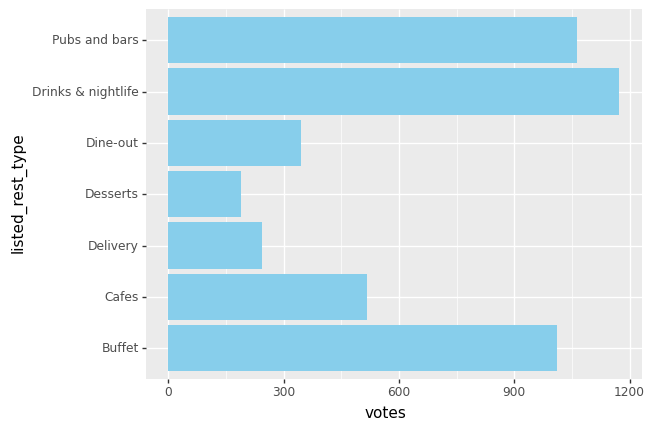

<ggplot: (8785589866185)>

In [ ]:
(ggplot(df2, aes('listed_rest_type', 'votes'))+ geom_bar(stat="summary", fill='skyblue') + coord_flip())

Drinks & Nightlife and pub type of restaurants are highly popular and got the maximum number of votes.

#### (10) The bar-graph is showing the cost incurred in different types of restaurants.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



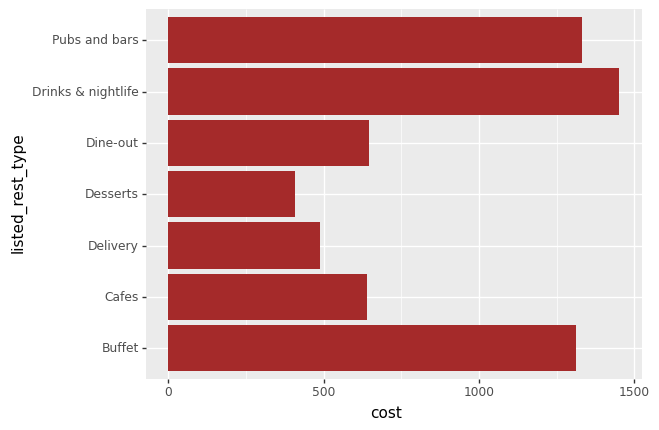

<ggplot: (8785591995577)>

In [ ]:
(ggplot(df2, aes('listed_rest_type', 'cost'))+ geom_bar(stat="summary", fill='brown') + coord_flip())

Also, the cost incurred in those type of restaurants is highest.

# **Missing Value Analysis**

In [ ]:
df.sample(5)

url  ... listed_in(city)
43489  https://www.zomato.com/bangalore/alibi-maya-in...  ...         MG Road
50571  https://www.zomato.com/bangalore/temptation-wh...  ...      Whitefield
24956  https://www.zomato.com/bangalore/nuty-kammanah...  ...    Kalyan Nagar
40747  https://www.zomato.com/bangalore/pizza-home-ma...  ...    Marathahalli
2683   https://www.zomato.com/bangalore/malabar-bay-b...  ...    Basavanagudi

[5 rows x 17 columns]

In [ ]:
df.isnull().sum()/len(df)*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

The columns : Rate, phone, location, restaurant type, dish_liked, cuisines and approx cost have missing values.

#### Figuring out the types of missing values for each column

In [ ]:
df[df.rate.isnull()].sample(8)

url  ...        listed_in(city)
27387  https://www.zomato.com/bangalore/khaja-militar...  ...  Koramangala 4th Block
24633  https://www.zomato.com/bangalore/ganesh-bakery...  ...           Kalyan Nagar
50895  https://www.zomato.com/bangalore/punjabi-thadk...  ...             Whitefield
15503  https://www.zomato.com/bangalore/al-falah-rest...  ...            Frazer Town
21122  https://www.zomato.com/bangalore/tawa-sagara-j...  ...              Jayanagar
31478  https://www.zomato.com/bangalore/senthur-cafe-...  ...  Koramangala 5th Block
16041  https://www.zomato.com/bangalore/brown-box-hsr...  ...                    HSR
41090  https://www.zomato.com/bangalore/zam-zam-biriy...  ...           Marathahalli

[8 rows x 17 columns]

The type of missing values in rate column could be MAR as the values show a clear pattern with the null values from the column book_table and dish_liked.

In [ ]:
df[df.rate.isnull()].sample(8)

url  ...        listed_in(city)
49350  https://www.zomato.com/bangalore/punjabi-last-...  ...          Sarjapur Road
37496  https://www.zomato.com/bangalore/r-k-biryani-c...  ...  Koramangala 7th Block
22547  https://www.zomato.com/bangalore/omleterian-jp...  ...               JP Nagar
4293   https://www.zomato.com/bangalore/eat-repeat-ex...  ...              Bellandur
40438  https://www.zomato.com/bangalore/s-s-naati-sty...  ...           Malleshwaram
24656  https://www.zomato.com/bangalore/sri-krishna-s...  ...           Kalyan Nagar
37091  https://www.zomato.com/bangalore/owls-kitchen-...  ...  Koramangala 7th Block
31419  https://www.zomato.com/bangalore/jee-aaya-nu-p...  ...  Koramangala 5th Block

[8 rows x 17 columns]

In [ ]:
#df[df.approx_cost(for two people).isnull()].sample(8)

From different sample sizes of rest_type column, it can be seen that the missing values of this column are showing a pattern with the column book_table. The reason behind these missing values could be that the customer didn't know which type of restaurant it was as they didn't go to the restaurant physically, mostly they had ordered online from those restaurants.The type of missing values in this rest_type column colud be MAR.

In [ ]:
df[df.dish_liked.isnull()].sample(8)

url  ...    listed_in(city)
22222  https://www.zomato.com/bangalore/bikaneri-swee...  ...           JP Nagar
1557   https://www.zomato.com/bangalore/encyclofoodia...  ...  Bannerghatta Road
39900  https://www.zomato.com/bangalore/just-bake-mag...  ...       Malleshwaram
9134   https://www.zomato.com/bangalore/nilu-ki-rasoi...  ...                BTM
25941  https://www.zomato.com/bangalore/the-pipe-rack...  ...       Kammanahalli
756    https://www.zomato.com/bangalore/sree-sagar-ba...  ...       Banashankari
25119  https://www.zomato.com/bangalore/hiya-bismilla...  ...       Kalyan Nagar
22779  https://www.zomato.com/bangalore/halli-rotti-m...  ...           JP Nagar

[8 rows x 17 columns]

Different sample size of dish-liked column shows that the null values are sometimes showing pattern with the book_table column, i.e. both of the columns are having null values. The reason could be customers didn't give feedback when they came physically to the restaurants, and giving feedback while ordering online is hassle-free.

To check the type of missing value of dish_liked column, chi-square test has been done. For this test, H0 : There is no association between the missingness in the dish_liked column and the other columns(For example, only book_table column has been taken here.).The critical  p -value associated to this test is equal to 0.05.

In [ ]:
df["dish_liked_missing"] = df["dish_liked"]
# The column is false
df["dish_liked_missing"] = False
# Replace where Height_missing with True where Height is missing
df.loc[df[df['dish_liked'].isnull()].index, "dish_liked_missing"] = True

In [ ]:
df[df["dish_liked_missing"]==True].groupby("book_table")["dish_liked_missing"].count()

book_table
No     27785
Yes      293
Name: dish_liked_missing, dtype: int64

In [ ]:
df[df["dish_liked_missing"]==False].groupby("book_table")["dish_liked_missing"].count()

book_table
No     17483
Yes     6156
Name: dish_liked_missing, dtype: int64

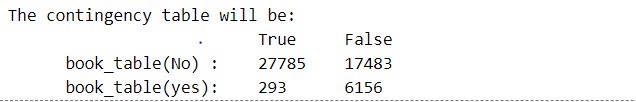

In [ ]:
table1 = [[27785, 17483],[293,6156]]
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(table1)
print("The p-value is esqual to {}".format(p))

The p-value is esqual to 0.0


The degree of freedom is 1 ((nrows-1) * (nclos-1)). The p-value is less than 0.05. So the null hypothesis is rejected. There is a relation between the dish_liked and book_table column. The type of missing value in dish_liked column could be MAR.

In [ ]:
df[df.phone.isnull()].sample(10)

url  ... dish_liked_missing
36771  https://www.zomato.com/bangalore/krazy-factory...  ...              False
2100   https://www.zomato.com/bangalore/spar-refresh-...  ...               True
29348  https://www.zomato.com/bangalore/eat-fit-btm-b...  ...              False
683    https://www.zomato.com/bangalore/meat-and-eat-...  ...               True
37388  https://www.zomato.com/bangalore/armani-kabab-...  ...               True
31657  https://www.zomato.com/bangalore/calicut-durba...  ...               True
28820  https://www.zomato.com/bangalore/krupa-sagar-k...  ...               True
26853  https://www.zomato.com/bangalore/punjabi-by-na...  ...              False
6444   https://www.zomato.com/bangalore/apsara-hotel-...  ...               True
20372  https://www.zomato.com/bangalore/the-enav-bowl...  ...               True

[10 rows x 18 columns]

Different sample sizes of phone columns show that the restaurants which have null values in online order_order and book_table columns, specifically have null values in phone column as well. The type of missing value in phone column could be MAR.

In [ ]:
df[df.location.isnull()].sample(8)


url  ... dish_liked_missing
33457  https://www.zomato.com/bangalore/la-lunch-box-...  ...               True
32131  https://www.zomato.com/bangalore/abs-absolute-...  ...               True
1662   https://www.zomato.com/bangalore/papa-khan-ras...  ...               True
9874   https://www.zomato.com/bangalore/papa-khan-ras...  ...               True
46609  https://www.zomato.com/bangalore/grill-biryani...  ...               True
30604  https://www.zomato.com/bangalore/manchow-koram...  ...               True
41980  https://www.zomato.com/bangalore/risalo-restau...  ...               True
16351  https://www.zomato.com/bangalore/desi-chatkara...  ...               True

[8 rows x 18 columns]

Missing values of location column: Different sample size has been taken to check if the missing values in location column are showing any pattern with the other columns. It can be seen that all the missing locations don't have any online order or book table or any review or votes from the customers. Those restaurants are most probably not visited or remain closed.

To check the type of missing value of location column, chi-square test has been done. For this test, H0 : There is no association between the missingness in the location column and the other columns(For example, only order_online column has been taken here.).The critical  p -value associated to this test is equal to 0.05.

In [ ]:
df["location_missing"] = df["location"]
# The column is false
df["location_missing"] = False
# Replace where Height_missing with True where Height is missing
df.loc[df[df['location'].isnull()].index, "location_missing"] = True

In [ ]:
df[df["location_missing"]==True].groupby("online_order")["location_missing"].count()
#df["location_missing"]

online_order
No    21
Name: location_missing, dtype: int64

In [ ]:
df[df["location_missing"]==False].groupby("online_order")["location_missing"].count()

online_order
No     21252
Yes    30444
Name: location_missing, dtype: int64

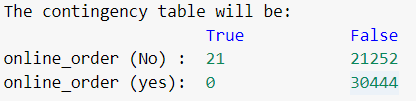

In [ ]:
table = [[21, 21252],[0,30444]]
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(table)
print("The p-value is esqual to {}".format(p))

The p-value is esqual to 1.4294246375208942e-07


The degree of freedom is 1 ((nrows-1) * (nclos-1)). The p-value is less than 0.05. So the null hypothesis can be rejected. The type of missing values in location column could be MAR.

In [ ]:
df[df.cuisines.isnull()].sample(10)

url  ... location_missing
26519  https://www.zomato.com/bangalore/abs-absolute-...  ...             True
50755  https://www.zomato.com/bangalore/watheen-nuts-...  ...            False
440    https://www.zomato.com/bangalore/lassi-spot-ku...  ...            False
40977  https://www.zomato.com/bangalore/chai-point-ma...  ...            False
30604  https://www.zomato.com/bangalore/manchow-koram...  ...             True
13591  https://www.zomato.com/bangalore/delhi-food-fa...  ...            False
7555   https://www.zomato.com/bangalore/delhi-food-fa...  ...            False
40354  https://www.zomato.com/bangalore/the-happy-veg...  ...             True
40625  https://www.zomato.com/bangalore/noodle-oodle-...  ...            False
31400  https://www.zomato.com/bangalore/manchow-koram...  ...             True

[10 rows x 19 columns]

Missing values of cuisines column: Different sample size has been taken to check if the missing values in cuisines column are showing any pattern with the other columns. It can be seen that most of the missing cuisines don't have any online order or book table or any review or votes from the customers. The type of missing value could be MAR.

#### Treating missing values

In [ ]:
missing_value = df.drop(columns=['url', 'address', 'phone', 'name', 'online_order', 'book_table', 'votes', 'reviews_list', 'menu_item', 'listed_in(type)',
                                 'dish_liked', 'menu_item', 'listed_in(city)','dish_liked_missing', 'location_missing'])
missing_value.rename(columns={'approx_cost(for two people)': 'cost'}, inplace=True)
missing_value.head(5)

rate      location  ...                        cuisines cost
0  4.1/5  Banashankari  ...  North Indian, Mughlai, Chinese  800
1  4.1/5  Banashankari  ...     Chinese, North Indian, Thai  800
2  3.8/5  Banashankari  ...          Cafe, Mexican, Italian  800
3  3.7/5  Banashankari  ...      South Indian, North Indian  300
4  3.8/5  Basavanagudi  ...        North Indian, Rajasthani  600

[5 rows x 5 columns]

All the columns having non-missing values have been dropped for easy analysis. dish_liked column had more than 50% missing values, so that column is also dropped. The phone column didn't have much significance, so it was dropped.

In [ ]:
missing_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rate       43942 non-null  object
 1   location   51696 non-null  object
 2   rest_type  51490 non-null  object
 3   cuisines   51672 non-null  object
 4   cost       51371 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [ ]:
missing_value["location"].fillna("Not available", inplace = True)
missing_value["cuisines"].fillna("Not known", inplace = True)
missing_value["rest_type"].fillna("Unknown", inplace = True)
missing_value.sample(10)

rate               location  ...                        cuisines cost
35088  3.8 /5                    HSR  ...                    North Indian  400
26901     NaN                    HSR  ...  Kebab, Rolls, Charcoal Chicken  400
1171    4.0/5               JP Nagar  ...           Continental, American  750
1764      NEW               JP Nagar  ...   Kerala, South Indian, Chinese  300
17355   3.8/5                    HSR  ...       Street Food, North Indian  250
33709  4.0 /5  Koramangala 5th Block  ...  Beverages, Fast Food, Desserts  350
38885  3.5 /5           Shanti Nagar  ...       Italian, Fast Food, Pizza  300
29559  3.3 /5                    HSR  ...                Bengali, Seafood  600
6905      NaN             Whitefield  ...           North Indian, Biryani  500
50452     NaN             Whitefield  ...                    North Indian  400

[10 rows x 5 columns]

The fillna function has been used to treat missing values for location, cuisines and rest_type columns.

In [ ]:
#Changing datatype for cost column

missing_value['cost'] = missing_value['cost'].replace({',': ''}, regex=True)
missing_value['cost'] = missing_value['cost'].astype(float)

missing_value.cost.value_counts()

300.0     7576
400.0     6562
500.0     4980
200.0     4857
600.0     3714
          ... 
560.0        1
60.0         1
160.0        1
469.0        1
3700.0       1
Name: cost, Length: 70, dtype: int64

In [ ]:
missing_value['cost'] = missing_value['cost'].interpolate(method ='linear', limit_direction ='forward').round()
missing_value['cost'].sample(10)

28931    1250.0
17711     950.0
13227    1500.0
13329    1000.0
2139      300.0
21633     500.0
32338     300.0
24858     650.0
36323     600.0
4469      300.0
Name: cost, dtype: float64

Intrapolate method has been used to treat the missing values in cost column.

In [ ]:
#changing datatype for rate column and putting null values for all "NEW" items in the column.

missing_value['rate']=missing_value.rate.astype(object)
missing_value['rate'] = missing_value['rate'].replace({'/5': ''}, regex=True)
missing_value = missing_value.replace({'rate': {'NEW': np.nan, '-': np.nan}})
missing_value.rate = missing_value.rate.astype('float64')

missing_value.rate.value_counts()

3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

In [ ]:
missing_value['rate'] = missing_value['rate'].replace(to_replace = np.nan, value = 0)
missing_value['rate'].isnull()==True

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rate, Length: 51717, dtype: bool

Here replacement method has been used for treating missing values in rate column. All the null values have been replaced with the value 0.

In [ ]:
missing_value.sample(8)

rate               location  ...                        cuisines    cost
38533   3.2      Commercial Street  ...                          Bakery   300.0
48865   3.9          Sarjapur Road  ...       Cafe, Desserts, Ice Cream   600.0
4025    3.8           Marathahalli  ...                    North Indian   150.0
33358   4.3  Koramangala 7th Block  ...               Beverages, Juices   350.0
12437   3.7                MG Road  ...                        Desserts   200.0
10425   3.6                    BTM  ...  North Indian, Chinese, Arabian   700.0
40510   4.5           Marathahalli  ...  North Indian, Mughlai, Italian  1300.0
11448   3.5                    BTM  ...                     Finger Food  1200.0

[8 rows x 5 columns]

This is the final dataframe without any null value.